In [1]:
import pandas as pd
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as plt

## Get forecasts from CSV files

In [2]:
df_final = pd.DataFrame(list(range(17)), columns=['hours_in_future'])

# Iterate over all files in the directory
for file_name in sorted(os.listdir(os.getcwd()+'/forecasts')):
        
    df = pd.read_csv(os.getcwd()+f'/forecasts/{file_name}')
    
    if len(df) != 17: continue

    date, hour = file_name.split('_')[2].split("-")
    df_final[f'forecast_{date[6:8]}-{date[4:6]}-{hour[:2]}'] = list(df.temp_air)
        
df_final = df_final.drop('hours_in_future', axis = 1)
df_final = df_final.dropna(axis=1, how='any')

print(f"\nWe have {len(df_final.columns.to_list())} 16-hour forecasts.\n")
display(df_final)

/var/folders/0x/l1m3sdhn7r59npk394yrpzk40000gn/T/ipykernel_1499/2725665708.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[f'forecast_{date[6:8]}-{date[4:6]}-{hour[:2]}'] = list(df.temp_air)



We have 4098 16-hour forecasts.



,forecast_19-05-22,forecast_19-05-23,forecast_20-05-00,forecast_20-05-01,forecast_20-05-02,forecast_20-05-03,forecast_20-05-05,forecast_20-05-06,forecast_20-05-07,forecast_20-05-08,...,forecast_03-12-18,forecast_03-12-19,forecast_03-12-20,forecast_04-12-00,forecast_04-12-01,forecast_04-12-02,forecast_04-12-03,forecast_04-12-04,forecast_04-12-05,forecast_04-12-06
0,8.574249,8.087067,7.755402,7.200653,7.143738,6.647675,5.867828,5.754303,7.271820,8.588654,...,8.085480,9.024384,9.257111,8.290436,8.454132,8.576874,8.622223,8.529175,8.377411,8.001038
1,8.101715,7.680145,7.205566,6.944550,6.764191,6.110870,5.565796,7.054840,8.737091,10.183105,...,8.825745,9.013336,9.439117,8.975525,8.794830,8.518188,8.486237,8.378876,8.460419,8.143341
2,7.490875,7.224640,6.954010,6.513031,6.375092,5.918915,6.791351,8.636322,10.205048,12.036468,...,8.994385,9.000671,9.510986,9.188141,8.736023,8.603424,8.428192,8.275604,8.348633,8.572784
3,7.127899,6.891022,6.521301,6.157501,5.961426,5.561157,8.241364,10.264008,12.194305,13.924042,...,9.118073,9.062042,9.327240,9.094635,8.754120,8.661652,8.407288,8.324738,8.488983,8.924469
4,6.887970,6.565460,6.061096,5.765686,5.603241,6.874481,9.790802,12.363617,14.036468,15.222259,...,9.126129,9.385223,9.427979,9.034149,8.772430,8.545166,8.453461,8.492706,8.909210,9.391998
5,6.492493,6.201996,5.638031,5.523102,6.860840,8.200470,11.933380,14.091705,15.192780,16.032684,...,8.936798,9.409271,9.357788,8.946259,8.661804,8.361725,8.529266,8.628845,9.107422,9.771393
6,6.125275,5.833618,5.472809,6.588379,8.249512,9.799469,13.678619,15.085297,15.927124,16.190704,...,9.102631,9.245087,9.246307,8.649872,8.509430,8.080963,8.695557,9.450592,9.553101,11.030243
7,5.781158,5.320740,6.642853,7.968384,9.858307,11.952850,14.790009,15.854492,16.191101,16.016937,...,9.140717,9.144806,9.227875,8.343811,8.481262,8.471100,9.374298,10.201447,10.956940,11.564423
8,5.277741,6.401306,7.977570,9.702789,11.906769,13.738861,15.530731,16.030975,15.817535,15.699738,...,9.145111,9.060425,9.042999,8.197144,8.650848,8.788452,10.241974,10.848389,11.579681,11.889221
9,6.180237,7.889710,9.694916,11.843780,13.696503,14.996429,15.767364,15.792999,15.420776,15.176422,...,9.077423,8.924591,8.956207,8.414581,8.919769,9.428314,11.232636,11.386780,11.905548,11.725739


## Get measurements from btrdb API

In [3]:
import datetime as dtm

# Function to gather data from database
def download_data(dt_start=dtm.datetime(2020,10,6,11,0),
                  dt_final=dtm.datetime.now()):
    
    # Specify specific exterior weather values to download
    channels = ['Exterior_we_Temperature_C']

    # Download data
    res = db.read_raw_db(dt_start, dt_final, channels)
    
    return res

In [4]:
# First and last dates in the data
dates = df_final.columns.to_list()
first_date = '2021-' + dates[0].split("_")[1] + ':00:00'
last_date = '2021-' + dates[-1].split("_")[1] + ':00:00'

# Convert to timestamps
format_string = "%Y-%d-%m-%H:%M:%S"
first_timestamp = dtm.datetime.strptime(first_date, format_string)
last_timestamp = dtm.datetime.strptime(last_date, format_string)
print(f"First timestamp: {first_timestamp}\nLast timestamp: {last_timestamp}")

First timestamp: 2021-05-19 22:00:00
Last timestamp: 2021-12-04 06:00:00


In [5]:
# Log into database
sys.path.append(os.getcwd()+'/measurements/btrdb_api')
from client import client as btrdb

db = btrdb()
db.login_no_interactive('device1', '123456')

# Download data
monitored_data = download_data(dt_start = first_timestamp, dt_final = last_timestamp)
monitored_data = monitored_data.rename(columns={'Exterior_we_Temperature_C': 'T_OA'})
monitored_data = monitored_data[['T_OA']]

# Average hourly
measurement_hourly = monitored_data.resample('H').mean()
print(f"Succesfully loaded hourly weather measurements.")
display(measurement_hourly)

Succesfully loaded hourly weather measurements.


,T_OA
date_time,
2021-05-19 22:00:00,8.983578
2021-05-19 23:00:00,8.500133
2021-05-20 00:00:00,7.984067
2021-05-20 01:00:00,6.871856
2021-05-20 02:00:00,7.322656
...,...
2021-12-04 01:00:00,9.941867
2021-12-04 02:00:00,9.914167
2021-12-04 03:00:00,9.752211


In [6]:
# For each forecast column, add a measurement column with increasing noise
df = df_final

for col in df.columns.to_list():

    # Convert to datetime
    date = '2021-' + col.split("_")[1] + ':00:00'
    format_string = "%Y-%d-%m-%H:%M:%S"
    date = dtm.datetime.strptime(date, format_string)

    # Find all measurements in the next 16 hours at that date
    next_hours = []
    for hour in range(17):
        next_hours.append(date + dtm.timedelta(hours=hour))

    try:
        measurements_next_hours = measurement_hourly.loc[next_hours]
    except:
        print(f"Some of the measurements did not exist for {date}, dropped the column.")
        df = df.drop(col, axis=1)
        df_final = df_final.drop(col, axis=1)
        continue

    #print(date)
    #print(list(measurements_next_hours.T_OA))  
    
    column_name = "measurement_" + col.split("_")[1]
    df[column_name] = list(measurements_next_hours.T_OA)

print("")
display(df)

/var/folders/0x/l1m3sdhn7r59npk394yrpzk40000gn/T/ipykernel_1499/1490316305.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = list(measurements_next_hours.T_OA)


Some of the measurements did not exist for 2021-12-03 14:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-03 16:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-03 17:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-03 18:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-03 19:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-03 20:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 00:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 01:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 02:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 03:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 04:00:00, dropped the column.
Some of the measurements did not exist for 2021-12-04 05:00:00, dropped the 

,forecast_19-05-22,forecast_19-05-23,forecast_20-05-00,forecast_20-05-01,forecast_20-05-02,forecast_20-05-03,forecast_20-05-05,forecast_20-05-06,forecast_20-05-07,forecast_20-05-08,...,measurement_03-12-02,measurement_03-12-03,measurement_03-12-04,measurement_03-12-05,measurement_03-12-06,measurement_03-12-07,measurement_03-12-08,measurement_03-12-10,measurement_03-12-11,measurement_03-12-13
0,8.574249,8.087067,7.755402,7.200653,7.143738,6.647675,5.867828,5.754303,7.271820,8.588654,...,10.059311,9.898656,9.738989,9.521956,9.462922,9.228556,9.235867,9.222933,9.464700,9.677956
1,8.101715,7.680145,7.205566,6.944550,6.764191,6.110870,5.565796,7.054840,8.737091,10.183105,...,9.898656,9.738989,9.521956,9.462922,9.228556,9.235867,9.153211,9.464700,9.348933,10.169867
2,7.490875,7.224640,6.954010,6.513031,6.375092,5.918915,6.791351,8.636322,10.205048,12.036468,...,9.738989,9.521956,9.462922,9.228556,9.235867,9.153211,9.222933,9.348933,9.677956,10.222222
3,7.127899,6.891022,6.521301,6.157501,5.961426,5.561157,8.241364,10.264008,12.194305,13.924042,...,9.521956,9.462922,9.228556,9.235867,9.153211,9.222933,9.464700,9.677956,10.169867,10.035511
4,6.887970,6.565460,6.061096,5.765686,5.603241,6.874481,9.790802,12.363617,14.036468,15.222259,...,9.462922,9.228556,9.235867,9.153211,9.222933,9.464700,9.348933,10.169867,10.222222,9.931322
5,6.492493,6.201996,5.638031,5.523102,6.860840,8.200470,11.933380,14.091705,15.192780,16.032684,...,9.228556,9.235867,9.153211,9.222933,9.464700,9.348933,9.677956,10.222222,10.035511,9.907678
6,6.125275,5.833618,5.472809,6.588379,8.249512,9.799469,13.678619,15.085297,15.927124,16.190704,...,9.235867,9.153211,9.222933,9.464700,9.348933,9.677956,10.169867,10.035511,9.931322,9.885556
7,5.781158,5.320740,6.642853,7.968384,9.858307,11.952850,14.790009,15.854492,16.191101,16.016937,...,9.153211,9.222933,9.464700,9.348933,9.677956,10.169867,10.222222,9.931322,9.907678,9.932422
8,5.277741,6.401306,7.977570,9.702789,11.906769,13.738861,15.530731,16.030975,15.817535,15.699738,...,9.222933,9.464700,9.348933,9.677956,10.169867,10.222222,10.035511,9.907678,9.885556,9.892567
9,6.180237,7.889710,9.694916,11.843780,13.696503,14.996429,15.767364,15.792999,15.420776,15.176422,...,9.464700,9.348933,9.677956,10.169867,10.222222,10.035511,9.931322,9.885556,9.932422,9.973933


## Compute confidence intervals

In [7]:
residuals = {}

# For every forecasted hour
for k in range(len(df)):

    residuals[f'hour{k}'] = []

    # For all forecasts
    for col in df_final.columns.to_list():
    
        forecast_name = "forecast_" + col.split("_")[1]
        measurement_name = "measurement_" + col.split("_")[1]
    
        residual = np.abs(df[measurement_name].iloc[k] - df[forecast_name].iloc[k])
        
        residuals[f'hour{k}'].append(residual)

In [8]:
def confidence_intevals(alpha):

    n = len(df_final.columns.to_list())

    CIs_final = []

    for k in range(len(df)):
    
        sorted_residuals = sorted(residuals[f'hour{k}'])
        CI = sorted_residuals[int((1-alpha)*(n+1))]
    
        CIs_final.append(CI)
    
    return(CIs_final)

alpha = 0.1
CIs = confidence_intevals(alpha)
print(CIs)

[2.4102025555533313, 2.313273333333333, 2.353639999995, 2.228993777773333, 2.5042659999999994, 2.332507777778334, 2.675285666668332, 2.520124333326665, 2.5709882222183325, 2.6398711111166655, 2.678220333335002, 2.7022454444466675, 2.7966293333350016, 3.001692444445002, 2.827686777780002, 3.0397588888849985, 2.757263333331668]


## Plots to illustrate

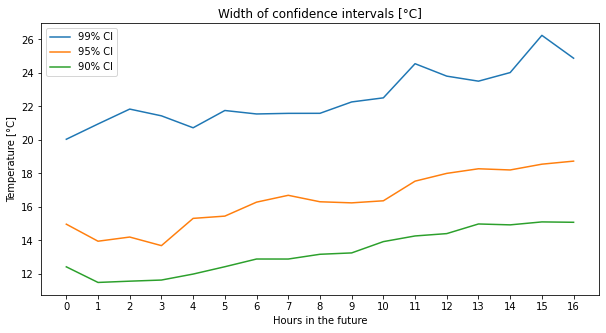

In [9]:
plt.figure(figsize=(10,5))
for alpha in [0.01, 0.05, 0.1]:
    plt.plot([2*x for x in confidence_intevals(alpha/10)], label=f'{round(100*(1-alpha))}% CI')
plt.title(f"Width of confidence intervals [°C]")
plt.xlabel("Hours in the future")
plt.ylabel("Temperature [°C]")
plt.xticks(range(len(CIs)))
plt.legend()
plt.show()

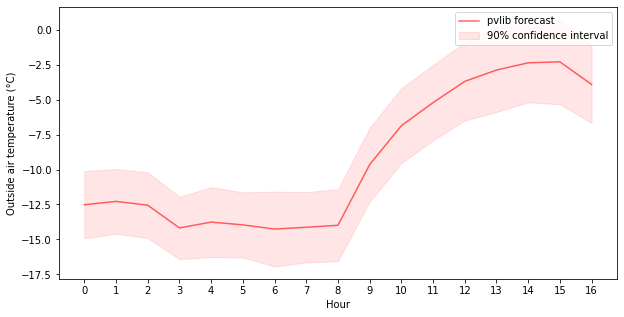

In [10]:
# Get the forecast
T_OA_list = [-12.52, -12.28, -12.55, -14.18, -13.76, -13.96, -14.26, 
             -14.13, -13.99, -9.65, -6.86, -5.21, -3.69, -2.88, -2.36, 
             -2.29, -3.91, -5.52, -6.13, -6.58, -7.09, -7.43, -7.99, -8.68]

# Plot the weather with the confidence interval
lower_bounds = [T_OA_list[i] - CIs[i] for i in range(len(CIs))]
upper_bounds = [T_OA_list[i] + CIs[i] for i in range(len(CIs))]
plt.figure(figsize=(10,5))
plt.plot(T_OA_list[:len(CIs)], color='red', alpha=0.6, label='pvlib forecast')
plt.fill_between(range(len(CIs)), lower_bounds, upper_bounds, color='red', alpha=0.1, label=f"{round(100*(1-alpha))}% confidence interval")
plt.xlabel("Hour")
plt.ylabel("Outside air temperature (°C)")
plt.xticks(list(range(len(CIs))))
plt.legend()
plt.show()

In [11]:
first_columns = df_final.columns.to_list()
num_outside = 0
num_tests = len(first_columns)

for col in first_columns[:num_tests]:
    
    forecast_name = "forecast_" + col.split("_")[1]
    measurement_name = "measurement_" + col.split("_")[1]

    lower_bounds = [df[forecast_name].iloc[i] - CIs[i] for i in range(len(df))]
    upper_bounds = [df[forecast_name].iloc[i] + CIs[i] for i in range(len(df))]

    for i in range(len(df)):
        if df[measurement_name].iloc[i] < lower_bounds[i] or df[measurement_name].iloc[i] > upper_bounds[i]:
            num_outside += 1

    #print(col)
    #plt.fill_between(range(len(df)), lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% confidence interval')
    #plt.plot(df[forecast_name])
    #plt.plot(df[measurement_name])
    #plt.show()

print(f"{round(100*num_outside/(17*num_tests),1)} % of the data points were \
outisde the {(1-alpha)*100} % confidence interval.")
print("\nNot supposed to try the CI on the holdout data, but still pretty bad.")

23.2 % of the data points were outisde the 90.0 % confidence interval.

Not supposed to try the CI on the holdout data, but still pretty bad.
